In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train.csv')
df.head()

,customer_id,firstname,lastname,record_number,days_since_opened,days_since_confirmed,primary_term,final_term,days_till_primary_close,days_till_final_close,...,encoded_payment_21,encoded_payment_22,encoded_payment_23,encoded_payment_24,encoded_loans_account_holder_type,encoded_loans_credit_status,encoded_loans_credit_type,encoded_loans_account_currency,primary_close_flag,final_close_flag
0,4814dfa2-45a8-46b9-8102-98ecbbec2d2a,Navya,Vasa,7,10,8,12,10,13,5,...,0.0,1.0,3.0,4.0,1,3,4,1,0,0
1,bb0abe41-cc89-4a1d-bb1c-48bd212ae00d,Azad,Warrior,5,15,6,7,6,9,1,...,3.0,3.0,3.0,4.0,1,3,4,1,0,0
2,edfd1a62-05da-4cfd-b8ae-521f05f0fd5f,Piya,Jha,1,15,17,8,5,9,1,...,3.0,3.0,3.0,4.0,1,3,4,1,0,0
3,3eaa4c2a-2316-48f4-b1b0-4aafe2286630,Rhea,Varma,11,7,2,11,13,14,8,...,3.0,3.0,3.0,4.0,1,2,4,1,0,0
4,c9a73239-baae-40eb-8855-dab07767ea86,Sahil,Dave,12,14,9,8,11,6,13,...,3.0,3.0,3.0,4.0,1,3,4,1,0,0


In [3]:
df.drop(['customer_id', 'firstname', 'lastname','record_number'], inplace=True, axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106674 entries, 0 to 1106673
Data columns (total 58 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   days_since_opened                   1106674 non-null  int64  
 1   days_since_confirmed                1106674 non-null  int64  
 2   primary_term                        1106674 non-null  int64  
 3   final_term                          1106674 non-null  int64  
 4   days_till_primary_close             1106674 non-null  int64  
 5   days_till_final_close               1106674 non-null  int64  
 6   loans_credit_limit                  1106674 non-null  int64  
 7   loans_next_payment_summary          1106674 non-null  int64  
 8   loans_outstanding_balance           1106674 non-null  int64  
 9   loans_max_overdue_amount            1106674 non-null  int64  
 10  loans_credit_cost_rate              1106674 non-null  int64  
 11  loans_withi

In [5]:
drop_cols = ['encoded_payment_'+str(i) for i in range(0,25)]
df.drop(drop_cols,inplace=True,axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106674 entries, 0 to 1106673
Data columns (total 33 columns):
 #   Column                              Non-Null Count    Dtype 
---  ------                              --------------    ----- 
 0   days_since_opened                   1106674 non-null  int64 
 1   days_since_confirmed                1106674 non-null  int64 
 2   primary_term                        1106674 non-null  int64 
 3   final_term                          1106674 non-null  int64 
 4   days_till_primary_close             1106674 non-null  int64 
 5   days_till_final_close               1106674 non-null  int64 
 6   loans_credit_limit                  1106674 non-null  int64 
 7   loans_next_payment_summary          1106674 non-null  int64 
 8   loans_outstanding_balance           1106674 non-null  int64 
 9   loans_max_overdue_amount            1106674 non-null  int64 
 10  loans_credit_cost_rate              1106674 non-null  int64 
 11  loans_within_5_days     

In [7]:
object_columns = ['is_zero_utilization', 'is_zero_over_limit_count', 'is_zero_max_over_limit_count',
                  'is_zero_loans_within_5_days',
                  'is_zero_loans_within_5_to_30_days', 'is_zero_loans_within_30_to_60_days',
                  'is_zero_loans_within_60_to_90_days', 'is_zero_loans_over_90_days']
for i in object_columns:
    df[i] = [1 if x == 'Yes' else 0 for x in df[i]]
    print(df[i].value_counts())

1    826061
0    280613
Name: is_zero_utilization, dtype: int64
1    1028080
0      78594
Name: is_zero_over_limit_count, dtype: int64
1    948807
0    157867
Name: is_zero_max_over_limit_count, dtype: int64
1    1017254
0      89420
Name: is_zero_loans_within_5_days, dtype: int64
1    920306
0    186368
Name: is_zero_loans_within_5_to_30_days, dtype: int64
1    1063517
0      43157
Name: is_zero_loans_within_30_to_60_days, dtype: int64
1    1082855
0      23819
Name: is_zero_loans_within_60_to_90_days, dtype: int64
1    1084174
0      22500
Name: is_zero_loans_over_90_days, dtype: int64


In [8]:
xtrain = df.drop(['primary_close_flag','final_close_flag'],axis=1)
ytrain1 = df['primary_close_flag']
ytrain2 = df['final_close_flag']

In [9]:
# We can also use between group variances to understand the differences between the groups
def BetweenGrpVar(var,grpvar):
    levels = set(grpvar)
    numlevels = len(levels)
    grandmean = np.mean(var)
    numtotal = 0
    denomtotal = 0
    for leveli in levels:
        levelidata=var[grpvar==leveli]
        levelilen=len(levelidata)
        meani=np.mean(levelidata)
        sdi=np.std(levelidata)
        numi=levelilen*((meani-grandmean)**2)
        denomi=levelilen
        numtotal+=numi
        denomtotal+=denomi
    vb=numtotal/(numlevels-1)
    return vb   

pd.options.display.float_format = '{:.3f}'.format
vb1 = BetweenGrpVar(xtrain,ytrain1)
print(BetweenGrpVar(xtrain,ytrain1))

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


days_since_opened                      11734.526
days_since_confirmed                      34.323
primary_term                         3164304.398
final_term                             19093.313
days_till_primary_close              6405425.396
days_till_final_close                 361567.022
loans_credit_limit                     23303.440
loans_next_payment_summary              7318.840
loans_outstanding_balance                580.735
loans_max_overdue_amount                  93.727
loans_credit_cost_rate                  6936.666
loans_within_5_days                       47.900
loans_within_5_to_30_days               2633.143
loans_within_30_to_60_days                 0.107
loans_within_60_to_90_days                 0.001
loans_over_90_days                         0.259
is_zero_loans_within_5_days              470.578
is_zero_loans_within_5_to_30_days        643.045
is_zero_loans_within_30_to_60_days         0.134
is_zero_loans_within_60_to_90_days         2.906
is_zero_loans_over_9

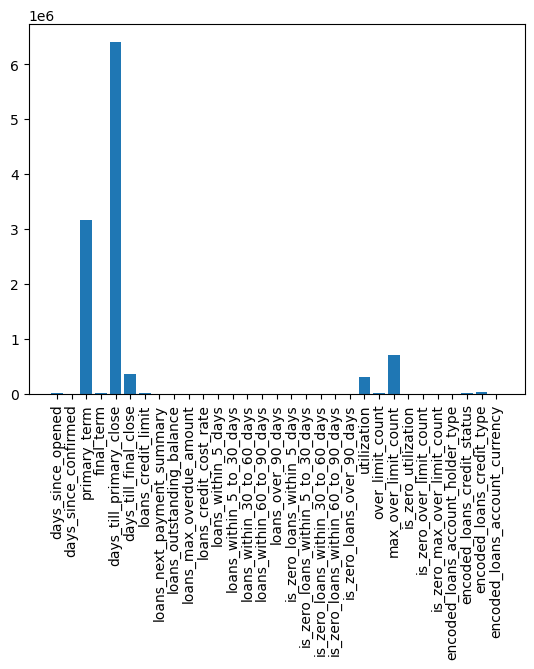

In [10]:
import matplotlib.pyplot as plt
plt.bar(x=xtrain.columns,height=vb1)
plt.xticks(rotation='vertical')
plt.show()

In [11]:
vb2 = BetweenGrpVar(xtrain,ytrain2)
print(BetweenGrpVar(xtrain,ytrain2))

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


days_since_opened                      19873.012
days_since_confirmed                   34908.322
primary_term                         1165522.617
final_term                             20896.622
days_till_primary_close               971710.989
days_till_final_close                2057277.058
loans_credit_limit                       501.000
loans_next_payment_summary              1104.854
loans_outstanding_balance                198.818
loans_max_overdue_amount                   1.654
loans_credit_cost_rate                   492.787
loans_within_5_days                      360.875
loans_within_5_to_30_days                 35.358
loans_within_30_to_60_days                 0.215
loans_within_60_to_90_days                 0.006
loans_over_90_days                         1.439
is_zero_loans_within_5_days              508.383
is_zero_loans_within_5_to_30_days        602.562
is_zero_loans_within_30_to_60_days         0.668
is_zero_loans_within_60_to_90_days         0.030
is_zero_loans_over_9

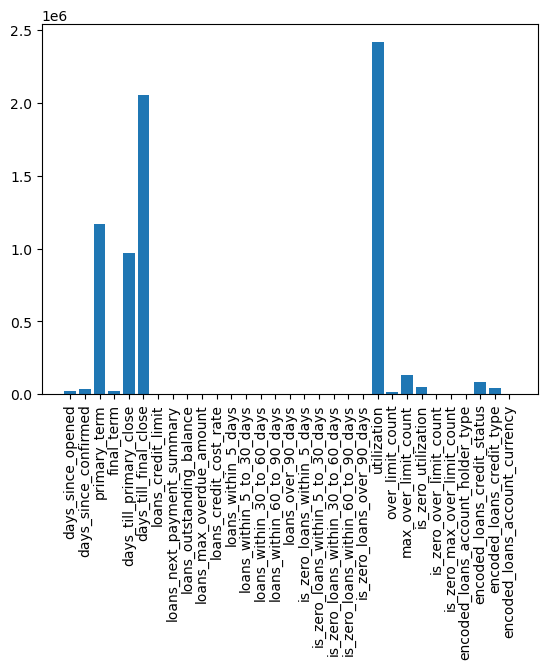

In [12]:
import matplotlib.pyplot as plt
plt.bar(x=xtrain.columns,height=vb2)
plt.xticks(rotation='vertical')
plt.show()

In [13]:
# Clearly, some of the features have far more variance between groups than others
# These features are much more useful than the others 

In [14]:
# WE can check which ones are most significant using variance thresholding
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold()
feature_names = df.columns

vt.fit_transform(xtrain)

for feature in zip(feature_names, vt.variances_):
    print(feature)

('days_since_opened', 19.0)
('days_since_confirmed', 17.0)
('primary_term', 17.0)
('final_term', 16.0)
('days_till_primary_close', 16.0)
('days_till_final_close', 15.0)
('loans_credit_limit', 19.0)
('loans_next_payment_summary', 1.5560796300826947)
('loans_outstanding_balance', 0.41104991888925296)
('loans_max_overdue_amount', 0.07686397244798802)
('loans_credit_cost_rate', 10.583750407135835)
('loans_within_5_days', 0.13369977550407194)
('loans_within_5_to_30_days', 1.3951719701795742)
('loans_within_30_to_60_days', 0.0038874253694313877)
('loans_within_60_to_90_days', 0.0002683637130115872)
('loans_over_90_days', 0.014717319986915112)
('is_zero_loans_within_5_days', 0.07427192121877273)
('is_zero_loans_within_5_to_30_days', 0.14004389604731138)
('is_zero_loans_within_30_to_60_days', 0.03747626233583064)
('is_zero_loans_within_60_to_90_days', 0.02105980846076964)
('is_zero_loans_over_90_days', 0.01991783326619213)
('utilization', 16.24862074196787)
('over_limit_count', 0.7315970951084

In [15]:
# Let us use a variance threshold of 2 to remove the irrelevant variables
vt = VarianceThreshold(threshold=0.2)
xtrain_new = vt.fit_transform(xtrain,ytrain1)
feat_names = vt.get_feature_names_out(xtrain.columns)

print('New number of columns: \n',xtrain_new.shape[1])
print('Selected features: ',feat_names)

New number of columns: 
 16
Selected features:  ['days_since_opened' 'days_since_confirmed' 'primary_term' 'final_term'
 'days_till_primary_close' 'days_till_final_close' 'loans_credit_limit'
 'loans_next_payment_summary' 'loans_outstanding_balance'
 'loans_credit_cost_rate' 'loans_within_5_to_30_days' 'utilization'
 'over_limit_count' 'max_over_limit_count' 'encoded_loans_credit_status'
 'encoded_loans_credit_type']


In [16]:
new = pd.DataFrame(xtrain_new,columns=feat_names)
new['primary_close_flag'] = ytrain1
new['final_close_flag'] = ytrain2
new.head()

,days_since_opened,days_since_confirmed,primary_term,final_term,days_till_primary_close,days_till_final_close,loans_credit_limit,loans_next_payment_summary,loans_outstanding_balance,loans_credit_cost_rate,loans_within_5_to_30_days,utilization,over_limit_count,max_over_limit_count,encoded_loans_credit_status,encoded_loans_credit_type,primary_close_flag,final_close_flag
0,10,8,12,10,13,5,11,2,3,4,13,16,2,17,3,4,0,0
1,15,6,7,6,9,1,5,6,3,7,16,16,2,17,3,4,0,0
2,15,17,8,5,9,1,6,2,3,4,16,16,2,17,3,4,0,0
3,7,2,11,13,14,8,14,3,5,0,16,18,2,17,2,4,0,0
4,14,9,8,11,6,13,5,6,3,4,16,16,2,17,3,4,0,0


In [17]:
new.to_csv('selected_variables.csv')

In [21]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106674 entries, 0 to 1106673
Data columns (total 18 columns):
 #   Column                       Non-Null Count    Dtype
---  ------                       --------------    -----
 0   days_since_opened            1106674 non-null  int64
 1   days_since_confirmed         1106674 non-null  int64
 2   primary_term                 1106674 non-null  int64
 3   final_term                   1106674 non-null  int64
 4   days_till_primary_close      1106674 non-null  int64
 5   days_till_final_close        1106674 non-null  int64
 6   loans_credit_limit           1106674 non-null  int64
 7   loans_next_payment_summary   1106674 non-null  int64
 8   loans_outstanding_balance    1106674 non-null  int64
 9   loans_credit_cost_rate       1106674 non-null  int64
 10  loans_within_5_to_30_days    1106674 non-null  int64
 11  utilization                  1106674 non-null  int64
 12  over_limit_count             1106674 non-null  int64
 13  max_over_lim